{(89, 93): 'tgct', (106, 110): 'tgct', (176, 180): 'tgcc', (297, 301): 'TGCC', (338, 342): 'tgcc', (342, 346): 'tgct', (365, 369): 'tgcc', (376, 380): 'tgcc', (429, 433): 'tgct', (443, 447): 'tgct', (467, 471): 'tgcc', (530, 534): 'tgct', (73, 83): 'tttcttcccc', (411, 416): 'gcatg', (493, 498): 'gcatg', (538, 543): 'catag'}
tgct
tgct
tgcc
TGCC
tgcc
tgct
tgcc
tgcc
tgct
tgct
tgcc
tgct
{(48, 52): 'tgcc', (63, 67): 'tgct', (146, 150): 'tgct', (168, 172): 'tgct', (172, 176): 'tgct', (189, 193): 'cgct', (211, 215): 'tgcc', (221, 225): 'tgct', (225, 229): 'cgct', (232, 236): 'tgct', (351, 361): 'tttttttttt', (382, 392): 'tccttttttc', (60, 65): 'gcatg', (325, 330): 'gcatg', (472, 477): 'catag'}
tgcc
tgct
tgct
tgct
tgct
cgct
tgcc
tgct
cgct
tgct
{(31, 35): 'cgcc', (40, 44): 'cgcc', (45, 49): 'cgcc', (97, 101): 'cgcc', (113, 117): 'cgcc', (148, 152): 'tgcc', (183, 187): 'tgcc', (194, 198): 'tgcc', (208, 212): 'tgcc', (290, 294): 'TGCC', (305, 309): 'TGCT', (310, 314): 'TGCC', (316, 320): 'TGCC', 

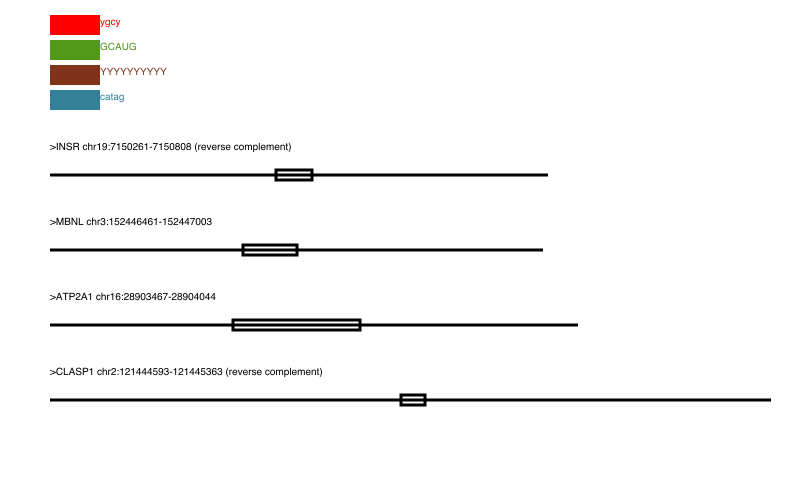

In [503]:
from io import BytesIO

import cairo
import IPython.display
import re

#!/usr/bin/env python

import argparse
import cairo

fasta_file = "/Users/GioiTran/Documents/shell/Bi624/Motif_Mark/new_Figure_1.fasta"
motif_file = "/Users/GioiTran/Documents/shell/Bi624/Motif_Mark/Fig_1_motifs.txt"

def parse_motif_file(file):
#parse through the motif file, append motifs into a list, account for ambiguous motif, return motif count?
    motif_list = []
    ambig_replacements = ["t","c"]
    with open(file, "rt") as fh:
        for line in fh:
            motif_list.append(line.strip())
        return(motif_list)
        



amg_motif_dict = {'y':('c','t'), 
                  'Y':('C', 'T')}

def amb_motif( line):
    motif_pos_dict = {}
    y_rgx = re.compile('[cut]gc[cut]', flags=re.IGNORECASE)
    Y10_rgx = re.compile('[CUT]{10}', flags=re.IGNORECASE)
    GCAUG_rgx = re.compile(r'gca[ut]g', flags=re.IGNORECASE)
    catag_rgx = re.compile('catag', flags=re.IGNORECASE)
  
            
    for y in y_rgx.finditer(line):
        #print(y.start(), y.end(), y.group())
        y_start_pos = y.start()
        y_end_pos = y.end()
        y_motif_key = y.group()
        motif_pos_dict[(y_start_pos, y_end_pos)] = y_motif_key       

    for Y10 in Y10_rgx.finditer(line):
       # print(Y10.start(), Y10.end(), Y10.group())
        Y10_start_pos = Y10.start()
        Y10_end_pos = Y10.end()
        Y10_motif_key = Y10.group()
        motif_pos_dict[(Y10_start_pos, Y10_end_pos)] = Y10_motif_key 
        
    for GCAUG in GCAUG_rgx.finditer(line):
       # print(GCAUG.start(), GCAUG.end(), GCAUG.group())
        GCAUG_start_pos = GCAUG.start()
        GCAUG_end_pos = GCAUG.end()
        GCAUG_motif_key = GCAUG.group()
        motif_pos_dict[(GCAUG_start_pos, GCAUG_end_pos)] = GCAUG_motif_key
        
    for catag in catag_rgx.finditer(line):
        #print(catag.start(), catag.end(), catag.group())
        catag_start_pos = catag.start()
        catag_end_pos = catag.end()
        catag_motif_key = catag.group()
        motif_pos_dict[(catag_start_pos, catag_end_pos)] = catag_motif_key
    return(motif_pos_dict)

            
m_list = parse_motif_file(motif_file)
#print(m_list)

#parse_motif_file(motif_file)

svgio = BytesIO()
with cairo.SVGSurface(svgio, 800, 500) as surface:
    
    context = cairo.Context(surface)
    context.set_line_width(20)
    context.set_source_rgb(1, 0, 0)
    context.move_to(50,25)
    context.line_to(100,25)
    context.show_text(m_list[0])
    context.stroke()
    context = cairo.Context(surface)
    context.set_line_width(20)
    context.set_source_rgb(.32, .60, 0.1)
    context.move_to(50,50)
    context.line_to(100,50)
    context.show_text(m_list[1])
    context.stroke()
    context = cairo.Context(surface)
    context.set_line_width(20)
    context.set_source_rgb(.5, .2, .1)
    context.move_to(50,75)
    context.line_to(100,75)
    context.show_text(m_list[3])
    context.stroke()
    context = cairo.Context(surface)
    context.set_source_rgb(.2,.5,.6)
    context.set_line_width(20)
    context.move_to(50,100)
    context.line_to(100,100)
    context.show_text(m_list[2])
    context.stroke()
    
    ambig_motif_list = parse_ambig_motif(m_list)
   # print(ambig_motif_list)
    with open(fasta_file, "rt") as file_handle:
        y_rgx = re.compile('[cut]gc[cut]', flags=re.IGNORECASE)
        Y10_rgx = re.compile('[CUT]{10}', flags=re.IGNORECASE)
        GCAUG_rgx = re.compile(r'gca[ut]g', flags=re.IGNORECASE)
        catag_rgx = re.compile('catag', flags=re.IGNORECASE)
        
        header_list = []
        header_pos = 150
        seq_y_coord = 175
        exon_y_coord = 170
        i = 0
        #get ambig motif list
        
        for line in file_handle:
            i +=1
            #remove skipped line
            line = line.rstrip()
        #store headers into list
            if ">" in line:
                header_list.append(line)
            if i % 2 == 0 :
                #print(line)
                seq_length = len(line)
                context.set_line_width(3)
                context.set_source_rgb(0, 0, 0)
                context.move_to(50, seq_y_coord)
                context.line_to(seq_length, seq_y_coord)
                context.stroke()
                seq_y_coord += 75
                #draw vertical line when motif is found
                if re.search('[A-Z]', line):
                    #find the location (span) of the capitilized exon
                    exon = re.search('[A-Z]+', line).span()
                    #x = re.findall('[A-Z]+', line)
                    #print(x)
                    #print(exon)
                    exon_start = exon[0]
                    exon_end = (exon[1])
                    context.set_line_width(3)
                    context.set_source_rgb(0,0,0)
                    context.rectangle(exon_start,exon_y_coord,exon_end - exon_start,10)
                    context.stroke()
                    exon_y_coord += 75
                    
                    #call ambig parsing function, get dict of motif positions
                    #keys = motif start & end position
                    #values = specifies motif sequence
                    motif_pos_dict = amb_motif(line)
                    print(motif_pos_dict)
                    
                    #loop through the values of dictionary to find each motif using re.search, ignore case sensitivity
                    for key, value in motif_pos_dict.items():
                        if re.search('[cut]gc[cut]', value, re.IGNORECASE):
                            print(value)
                    
                    
                
                    
                
            



        for header in header_list:
        #print(header)
            context.set_source_rgb(0, 0, 0)
            context.move_to(50, header_pos)
            context.show_text(header)
            #context.stroke()
            header_pos += 75
    
 
IPython.display.SVG(data=svgio.getvalue())




In [485]:
motif_list = parse_motif_file(motif_file)
#print(motif_list)
seq_line = "atgtccacatgtagtcacgtttgacatcccagggccacctcagcaggccgtctctggggagaattttctctgatttcttccccttcccttgctggacccctgcacctgctggggaagatgtagctcactccgtctagcaagtgatgggagcgagtggtccagggtcaaagccagggtgcccttactcggacacatgtggcctccaagtgtcagagcccagtggtctgtctaatgaagttccctctgtcctcaaaggcgttggttttgtttccacagAAAAACCTCTTCAGGCACTGGTGCCGAGGACCCTAGgtatgactcacctgtgcgacccctggtgcctgctccgcgcagggccggcggcgtgccaggcagatgcctcggagaacccaggggtttctgtggctttttgcatgcggcgggcagctgtgctggagagcagatgcttcaccaattcagaaatccaatgccttcactctgaaatgaaatctgggcatgaatgtggggagaaaccttcactaacacactcttgctaaaacatagaatca"

#print(mbnl_motif_dict['y'])
def amb_motif( line):
    motif_pos_dict = {}
    y_rgx = re.compile('[cut]gc[cut]', flags=re.IGNORECASE)
    Y10_rgx = re.compile('[CUT]{10}', flags=re.IGNORECASE)
    GCAUG_rgx = re.compile(r'gca[ut]g', flags=re.IGNORECASE)
    catag_rgx = re.compile('catag', flags=re.IGNORECASE)
  
            
    for y in y_rgx.finditer(line):
        #print(y.start(), y.end(), y.group())
        y_start_pos = y.start()
        y_end_pos = y.end()
        y_motif_key = y.group()
        motif_pos_dict[(y_start_pos, y_end_pos)] = y_motif_key       

    for Y10 in Y10_rgx.finditer(line):
       # print(Y10.start(), Y10.end(), Y10.group())
        Y10_start_pos = Y10.start()
        Y10_end_pos = Y10.end()
        Y10_motif_key = Y10.group()
        motif_pos_dict[(Y10_start_pos, Y10_end_pos)] = Y10_motif_key 
        
    for GCAUG in GCAUG_rgx.finditer(line):
       # print(GCAUG.start(), GCAUG.end(), GCAUG.group())
        GCAUG_start_pos = GCAUG.start()
        GCAUG_end_pos = GCAUG.end()
        GCAUG_motif_key = GCAUG.group()
        motif_pos_dict[(GCAUG_start_pos, GCAUG_end_pos)] = GCAUG_motif_key
        
    for catag in catag_rgx.finditer(line):
        #print(catag.start(), catag.end(), catag.group())
        catag_start_pos = catag.start()
        catag_end_pos = catag.end()
        catag_motif_key = catag.group()
        motif_pos_dict[(catag_start_pos, catag_end_pos)] = catag_motif_key
    return(motif_pos_dict)
        
dict =amb_motif(seq_line)
     #how to acess values of certain motifs   
print(dict)
for key, value in dict.items():
        #if "tgct" in value:
        print(key)

    


{(89, 93): 'tgct', (106, 110): 'tgct', (176, 180): 'tgcc', (297, 301): 'TGCC', (338, 342): 'tgcc', (342, 346): 'tgct', (365, 369): 'tgcc', (376, 380): 'tgcc', (429, 433): 'tgct', (443, 447): 'tgct', (467, 471): 'tgcc', (530, 534): 'tgct', (73, 83): 'tttcttcccc', (411, 416): 'gcatg', (493, 498): 'gcatg', (538, 543): 'catag'}
(89, 93)
(106, 110)
(176, 180)
(297, 301)
(338, 342)
(342, 346)
(365, 369)
(376, 380)
(429, 433)
(443, 447)
(467, 471)
(530, 534)
(73, 83)
(411, 416)
(493, 498)
(538, 543)
